In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('CBC Report.csv') 
df.head()

,Serial,Date,Gender,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets,Result
0,A2308164543,2/8/2023,Female,40.0,11.2,32.0,11.30,65,23.0,10.0,2.0,0.0,4.04,30,Positive
1,A2308164502,2/8/2023,Male,13.0,11.6,59.0,7.80,49,42.0,9.0,0.0,0.0,4.34,40,Positive
2,A2308164673,3/8/2023,Male,23.0,15.1,NaN,3.85,65,25.0,9.0,1.0,0.0,5.43,30,Positive
3,A2308164685,3/8/2023,Male,58.0,8.5,NaN,10.30,85,6.0,6.0,3.0,0.0,3.00,30,Positive
4,A2308164626,2/8/2023,Female,35.0,12.0,28.0,6.70,54,20.0,4.0,1.0,0.0,4.30,40,Positive


In [3]:
df.isnull().sum()

Serial          1
Date            0
Gender          0
Age             0
Haemoglobin     0
ESR            46
WBC             0
Neutrophil      0
Lymphocyte      1
Monocyte        1
Eosinophil      1
Basophil        1
RBC             1
Platelets       0
Result          0
dtype: int64

In [4]:
# Fill missing values
df["ESR"].fillna(df["ESR"].median(), inplace=True)  # Fill ESR with median
df["Lymphocyte"].fillna(df["Lymphocyte"].mean(), inplace=True)  # Fill Lymphocyte with mean
df["Monocyte"].fillna(df["Monocyte"].mean(), inplace=True)  # Fill Monocyte with mean
df["Eosinophil"].fillna(df["Eosinophil"].mean(), inplace=True)  # Fill Eosinophil with mean
df["Basophil"].fillna(df["Basophil"].mean(), inplace=True)  # Fill Basophil with mean
df["RBC"].fillna(df["RBC"].median(), inplace=True)  # Fill RBC with median


In [5]:
df.drop(columns=["Serial", "Date"], inplace=True)  # Remove unnecessary columns


In [6]:
df.drop_duplicates()

,Gender,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets,Result
0,Female,40.0,11.2,32.0,11.30,65,23.0,10.0,2.0,0.0,4.04,30,Positive
1,Male,13.0,11.6,59.0,7.80,49,42.0,9.0,0.0,0.0,4.34,40,Positive
2,Male,23.0,15.1,16.0,3.85,65,25.0,9.0,1.0,0.0,5.43,30,Positive
3,Male,58.0,8.5,16.0,10.30,85,6.0,6.0,3.0,0.0,3.00,30,Positive
4,Female,35.0,12.0,28.0,6.70,54,20.0,4.0,1.0,0.0,4.30,40,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Female,55.0,7.4,110.0,16.43,80,16.0,4.0,0.0,0.0,2.91,426,Negative
296,Female,3.0,12.4,14.0,11.50,68,29.0,2.0,1.0,0.0,4.73,227,Negative
297,Male,25.0,14.6,24.0,7.00,59,25.0,9.0,7.0,0.0,4.88,215,Negative
299,Male,26.0,13.4,50.0,6.40,57,37.0,5.0,1.0,0.0,4.73,221,Negative


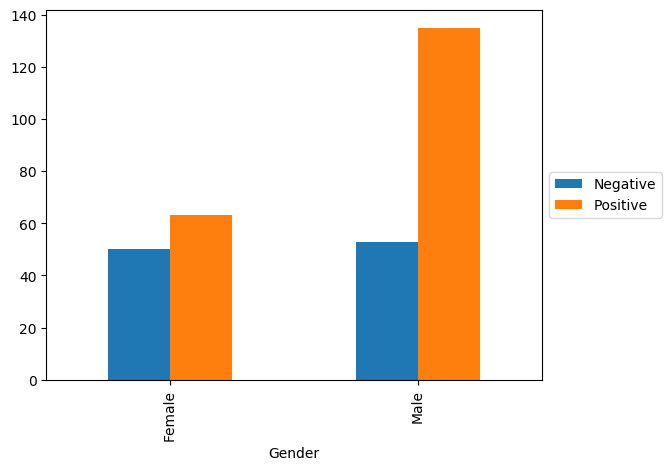

In [7]:
pd.crosstab(df["Gender"],df["Result"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

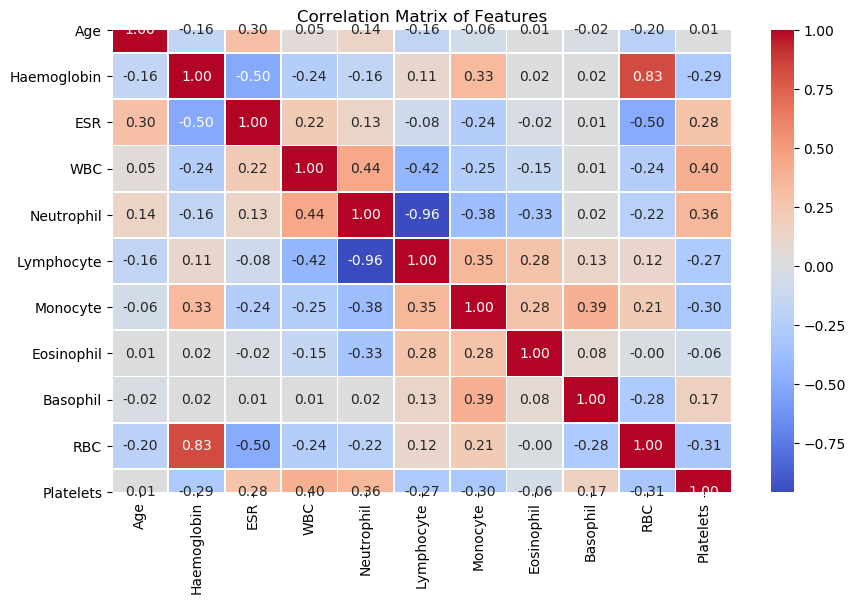

In [8]:
# Compute the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


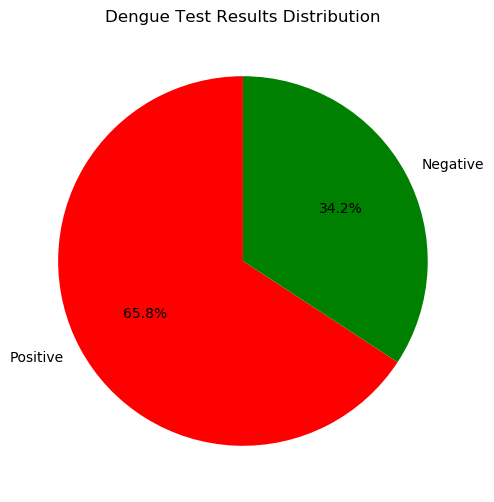

In [9]:
# Pie Chart for Result Distribution
plt.figure(figsize=(6, 6))
df['Result'].value_counts().plot.pie(autopct="%.1f%%", colors=["red", "green"], labels=["Positive", "Negative"], startangle=90)
plt.title("Dengue Test Results Distribution")
plt.ylabel('')  # Remove y-label for cleaner look
plt.show()


In [10]:
from sklearn import preprocessing  

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Apply Label Encoding to 'Gender' and 'Result' columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Result'] = label_encoder.fit_transform(df['Result'])  # 0: Negative, 1: Positive

# Display first few rows to verify
df.head()


,Gender,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets,Result
0,0,40.0,11.2,32.0,11.30,65,23.0,10.0,2.0,0.0,4.04,30,1
1,1,13.0,11.6,59.0,7.80,49,42.0,9.0,0.0,0.0,4.34,40,1
2,1,23.0,15.1,16.0,3.85,65,25.0,9.0,1.0,0.0,5.43,30,1
3,1,58.0,8.5,16.0,10.30,85,6.0,6.0,3.0,0.0,3.00,30,1
4,0,35.0,12.0,28.0,6.70,54,20.0,4.0,1.0,0.0,4.30,40,1


In [11]:
# Prepare the data
X = df.drop(['Result'], axis=1)
y = df['Result']

#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 301
Total features found in dataset= 12
80% dataset for training : 240
20% dataset for testing  : 61


In [12]:
accuracy = []
precision = []
recall = []
fscore = []

In [13]:
# Function to calculate various metrics such as accuracy, precision, recall, and F1 score
def calculateMetrics(algorithm, predict, testY):
    # Calculate precision, recall, F1-score, and accuracy
    p = precision_score(testY, predict, average='macro') * 100
    r = recall_score(testY, predict, average='macro') * 100
    f = f1_score(testY, predict, average='macro') * 100
    a = accuracy_score(testY, predict) * 100

    # Print the metrics
    print()
    print(f"{algorithm} Accuracy  : {a}")
    print(f"{algorithm} Precision : {p}")
    print(f"{algorithm} Recall    : {r}")
    print(f"{algorithm} FMeasure  : {f}")
    
   
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(testY, predict)
    
    # Define labels based on unique classes in testY
    labels = sorted(np.unique(testY))  # Unique labels sorted

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap="viridis", fmt="g")
    ax.set_ylim([0, len(labels)])
    plt.title(f"{algorithm} Confusion Matrix")
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


Random Forest Accuracy  : 93.44262295081968
Random Forest Precision : 92.0
Random Forest Recall    : 95.0
Random Forest FMeasure  : 93.02059496567506


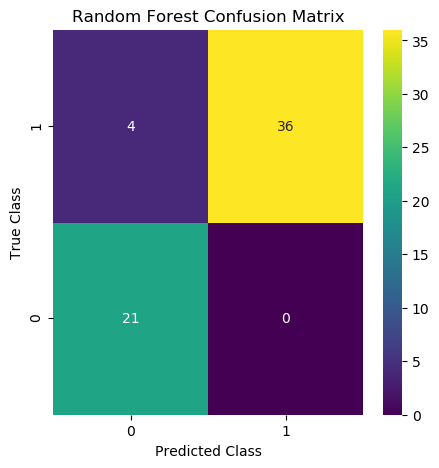

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

# Split dataset (stratify ensures train-test balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Random Forest Model (No class weights needed)
rf_cls = RandomForestClassifier(random_state=42)
tuning_param = {"n_estimators": [50, 100], "max_depth": [5, 10]}
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=skf)
tuned_rf.fit(X_train, y_train)

# Predictions & Evaluation
predict = tuned_rf.predict(X_test)
calculateMetrics("Random Forest", predict, y_test)


Decision Tree Accuracy  : 93.44262295081968
Decision Tree Precision : 92.16247139588101
Decision Tree Recall    : 93.86904761904762
Decision Tree FMeasure  : 92.8904428904429


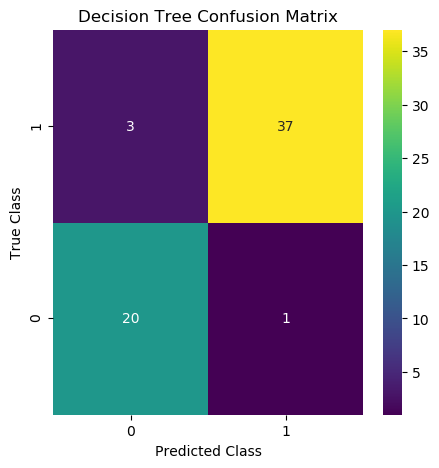

In [15]:
# Decision Tree Model
dt_cls = DecisionTreeClassifier()
tuning_param = {"splitter": ["best", "random"], "max_depth": [2, 5]}
tuned_dt = GridSearchCV(dt_cls, tuning_param, cv=skf)
tuned_dt.fit(X_train, y_train)

# Predictions & Evaluation
predict = tuned_dt.predict(X_test)
calculateMetrics("Decision Tree", predict, y_test)

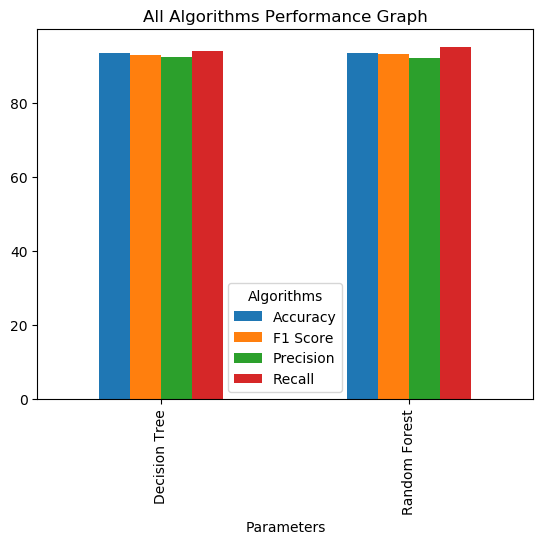

In [16]:
#all algorithms performance graph
df = pd.DataFrame([['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','F1 Score',fscore[0]],['Random Forest','Accuracy',accuracy[0]],
                   ['Decision Tree','Precision',precision[1]],['Decision Tree','Recall',recall[1]],['Decision Tree','F1 Score',fscore[1]],['Decision Tree','Accuracy',accuracy[1]],
        
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import joblib  # For loading the trained model



# Function to make predictions
def predict_dengue():
    try:
        # Gender mapping
        gender_mapping = {"Male": 0, "Female": 1}
        gender = gender_mapping[gender_var.get()]
        
        # Collecting input values in correct sequence
        input_data = {
            "Gender": [gender],
            "Age": [float(age_entry.get())],
            "Haemoglobin": [float(haemoglobin_entry.get())],
            "ESR": [float(esr_entry.get())],
            "WBC": [float(wbc_entry.get())],
            "Neutrophil": [float(neutrophil_entry.get())],
            "Lymphocyte": [float(lymphocyte_entry.get())],
            "Monocyte": [float(monocyte_entry.get())],
            "Eosinophil": [float(eosinophil_entry.get())],
            "Basophil": [float(basophil_entry.get())],
            "RBC": [float(rbc_entry.get())],
            "Platelets": [float(platelets_entry.get())]
        }

        df_test = pd.DataFrame(input_data)

        # Ensure column order matches model's training data
        feature_order = ["Gender", "Age", "Haemoglobin", "ESR", "WBC", "Neutrophil",
                         "Lymphocyte", "Monocyte", "Eosinophil", "Basophil", "RBC", "Platelets"]
        df_test = df_test[feature_order]

        # Get prediction probability
        y_probs = tuned_rf.predict_proba(df_test)[:, 1]  
        
        # Threshold-based classification
        threshold = 0.5
        y_pred = (y_probs > threshold).astype(int)

        # Display result
        result_text = "Dengue Detected" if y_pred[0] == 1 else "No Dengue Detected"
        result_label.config(text=result_text, fg="white", bg="black")

    except Exception as e:
        result_label.config(text=f"Error: {e}", fg="red", bg="black")

# Create GUI window
root = tk.Tk()
root.title("Dengue Detection")
root.state('zoomed')  # Maximized screen
root.configure(bg="#ff7899")

# Title
title_label = tk.Label(root, text="Dengue Detection", font=("Arial", 28, "bold"), fg="black", bg="#ff7899")
title_label.pack(pady=20)

# Black Box Frame
frame = tk.Frame(root, bg="black")
frame.pack(expand=True, fill="both", padx=50, pady=20)

# Configure grid layout
for i in range(7):  # 7 rows for input fields
    frame.grid_rowconfigure(i, weight=1)
for j in range(4):  # 4 columns for spacing
    frame.grid_columnconfigure(j, weight=1)

# Gender Dropdown
tk.Label(frame, text="Gender:", fg="white", bg="black", font=("Arial", 14)).grid(row=0, column=0, sticky="w", padx=10, pady=10)
gender_var = tk.StringVar()
gender_dropdown = ttk.Combobox(frame, textvariable=gender_var, values=["Male", "Female"], font=("Arial", 14))
gender_dropdown.grid(row=0, column=1, pady=10, padx=10, sticky="ew")
gender_dropdown.current(0)

# Labels and Entry Fields (Sequence Maintained)
labels = ["Age", "Haemoglobin", "ESR", "WBC", "Neutrophil", 
          "Lymphocyte", "Monocyte", "Eosinophil", "Basophil", 
          "RBC", "Platelets"]

entry_vars = {}

for i, text in enumerate(labels):
    row, col = divmod(i+1, 2)  # Adjust row and column dynamically
    label = tk.Label(frame, text=f"{text}:", fg="white", bg="black", font=("Arial", 14))
    label.grid(row=row, column=col*2, sticky="w", padx=10, pady=10)
    
    entry_var = tk.StringVar()
    entry = ttk.Entry(frame, font=("Arial", 14), textvariable=entry_var)
    entry.grid(row=row, column=col*2+1, pady=10, padx=10, sticky="ew")
    entry_vars[text] = entry

# Assign entry fields in correct order
age_entry = entry_vars["Age"]
haemoglobin_entry = entry_vars["Haemoglobin"]
esr_entry = entry_vars["ESR"]
wbc_entry = entry_vars["WBC"]
neutrophil_entry = entry_vars["Neutrophil"]
lymphocyte_entry = entry_vars["Lymphocyte"]
monocyte_entry = entry_vars["Monocyte"]
eosinophil_entry = entry_vars["Eosinophil"]
basophil_entry = entry_vars["Basophil"]
rbc_entry = entry_vars["RBC"]
platelets_entry = entry_vars["Platelets"]

# Predict Button
predict_button = tk.Button(frame, text="Predict", font=("Arial", 16, "bold"), bg="red", fg="black", 
                           command=predict_dengue)
predict_button.grid(row=7, column=0, columnspan=4, pady=20, sticky="ew")

# Prediction Label
result_label = tk.Label(frame, text="", font=("Arial", 18, "bold"), fg="white", bg="black")
result_label.grid(row=8, column=0, columnspan=4, pady=20)

# Run the GUI
root.mainloop()
